In [31]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Bankruptcy.csv')
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df.head()


,BankruptcyFlag,ROA_PreTax_DepAdj,ROA_AfterTax,ROA_BookDep,GrossMargin_Op,GrossMargin_Realized,OpProfit_Margin,NetMargin_PreTax,NetMargin_AfterTax,NonOp_RevRatio,...,NetIncome_to_Assets,Assets_to_GNP,NoCredit_Period,GrossProfit_to_Sales,NetIncome_to_Equity,Liabilities_to_Equity,DFL,InterestCoverage,NetIncome_PositiveFlag,Equity_to_Liabilities
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BankruptcyFlag               6819 non-null   int64  
 1   ROA_PreTax_DepAdj            6819 non-null   float64
 2   ROA_AfterTax                 6819 non-null   float64
 3   ROA_BookDep                  6819 non-null   float64
 4   GrossMargin_Op               6819 non-null   float64
 5   GrossMargin_Realized         6819 non-null   float64
 6   OpProfit_Margin              6819 non-null   float64
 7   NetMargin_PreTax             6819 non-null   float64
 8   NetMargin_AfterTax           6819 non-null   float64
 9   NonOp_RevRatio               6819 non-null   float64
 10  InterestRate_Consistent      6819 non-null   float64
 11  OpExpense_to_Rev             6819 non-null   float64
 12  RDE_to_Rev                   6819 non-null   float64
 13  CashFlow_to_Assets

In [34]:
df.shape

(6819, 96)

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isnull().sum().sum()

np.int64(0)

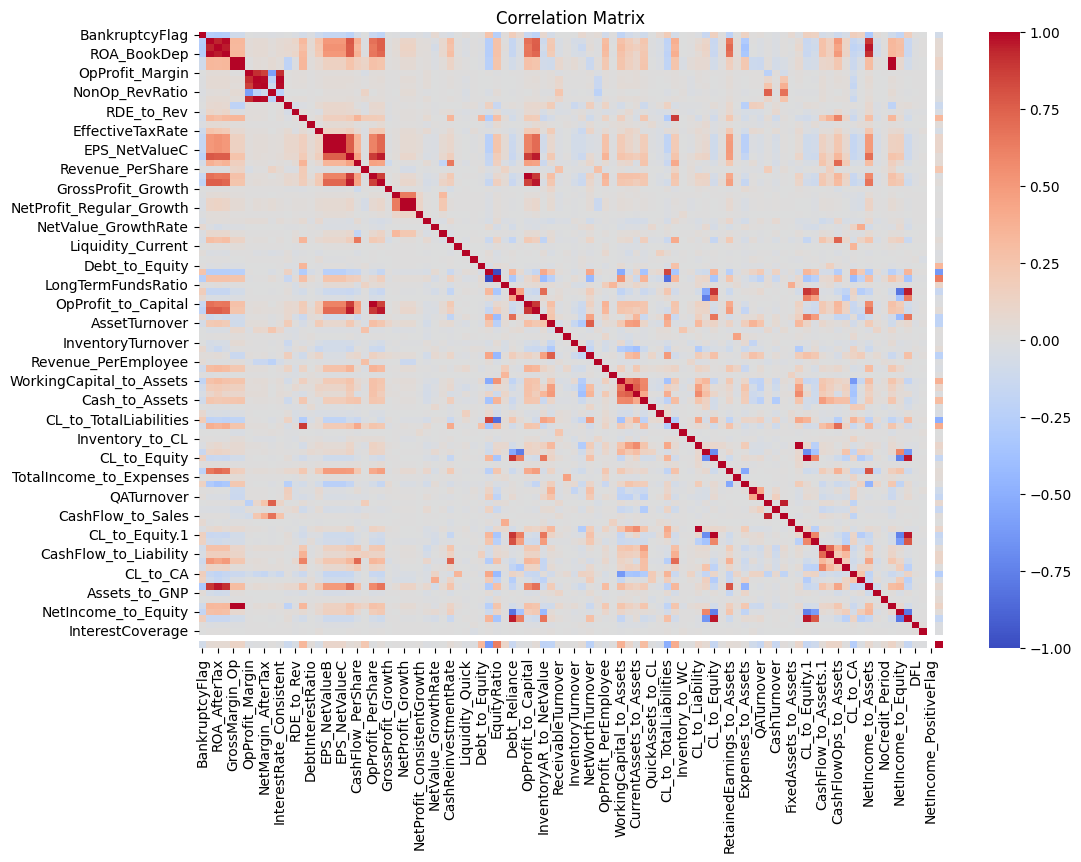

In [37]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [38]:
#preprocessing
from sklearn.model_selection import train_test_split
X=df.drop('BankruptcyFlag',axis=1)
y=df['BankruptcyFlag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
#importing models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [40]:
models_used={
    "SVM":SVC(),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for algo, model in models_used.items():
    model.fit(X_train, y_train)
    result = model.score(X_test, y_test)
    print(f"accuracy for {model} :{result*100}")

accuracy for SVC() :96.40762463343108
accuracy for KNeighborsClassifier() :96.18768328445748
accuracy for LogisticRegression() :96.48093841642229
accuracy for DecisionTreeClassifier() :94.42815249266863
accuracy for RandomForestClassifier() :96.40762463343108
accuracy for GradientBoostingClassifier() :96.40762463343108
accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=Non

In [41]:
from sklearn.decomposition import PCA

In [42]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

In [43]:
models_used_after_reducing={
    "SVM":SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for algo, model in models_used_after_reducing.items():
    model.fit(X_train, y_train)
    rresult = model.score(X_test, y_test)
    print(f"accuracy for {model} :{rresult*100}")

accuracy for SVC() :96.40762463343108
accuracy for KNeighborsClassifier() :96.18768328445748
accuracy for LogisticRegression() :96.48093841642229
accuracy for DecisionTreeClassifier() :95.16129032258065
accuracy for RandomForestClassifier() :96.5542521994135
accuracy for GradientBoostingClassifier() :96.48093841642229
accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None

SVM - Accuracy: 96.41% 
 Precision: 1.0000 
 Recall: 0.0200 
 F1: 0.0392
 Auc:0.51

KNN - Accuracy: 96.19% 
 Precision: 0.4286 
 Recall: 0.1200 
 F1: 0.1875
 Auc:0.5569558599695587

LogisticRegression - Accuracy: 96.48% 
 Precision: 0.5714 
 Recall: 0.1600 
 F1: 0.2500
 Auc:0.5777168949771689

DecisionTree - Accuracy: 94.94% 
 Precision: 0.3061 
 Recall: 0.3000 
 F1: 0.3030
 Auc:0.637062404870624

RandomForest - Accuracy: 96.19% 
 Precision: 0.4375 
 Recall: 0.1400 
 F1: 0.2121
 Auc:0.5665753424657535

GradientBoosting - Accuracy: 96.41% 
 Precision: 0.5217 
 Recall: 0.2400 
 F1: 0.3288
 Auc:0.615814307458143

XGBoost - Accuracy: 96.55% 
 Precision: 0.5882 
 Recall: 0.2000 
 F1: 0.2985
 Auc:0.5973363774733638



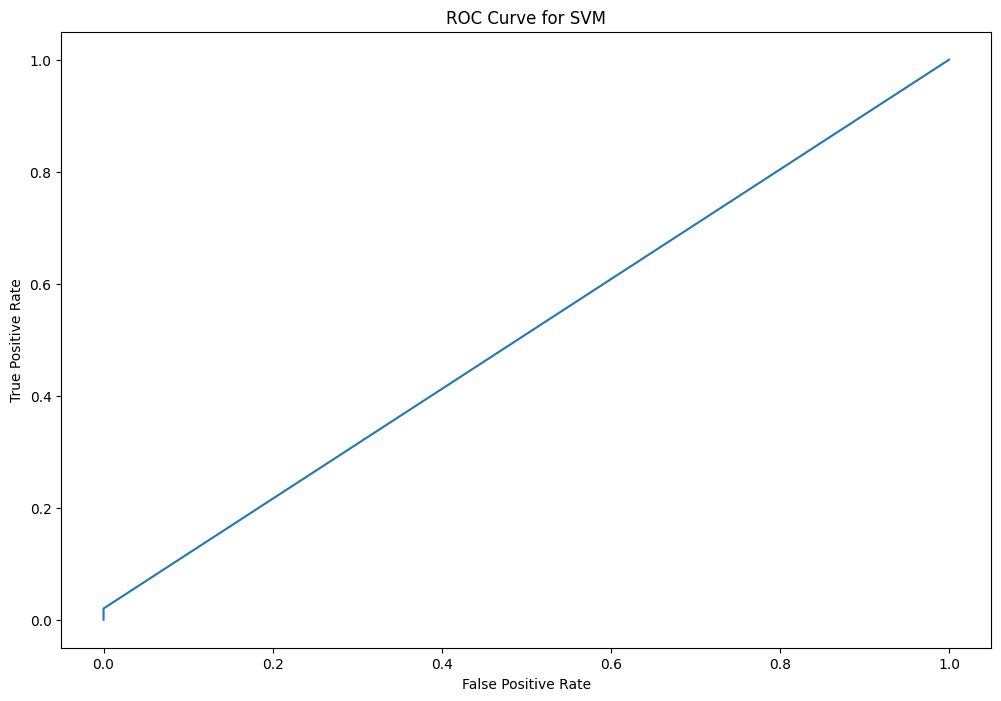

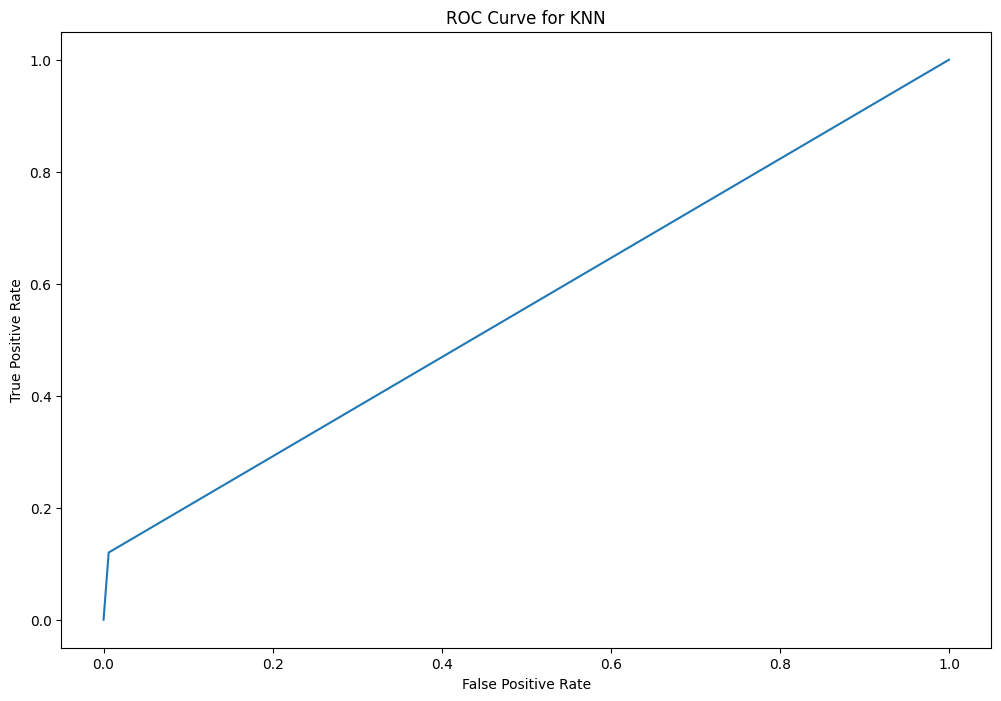

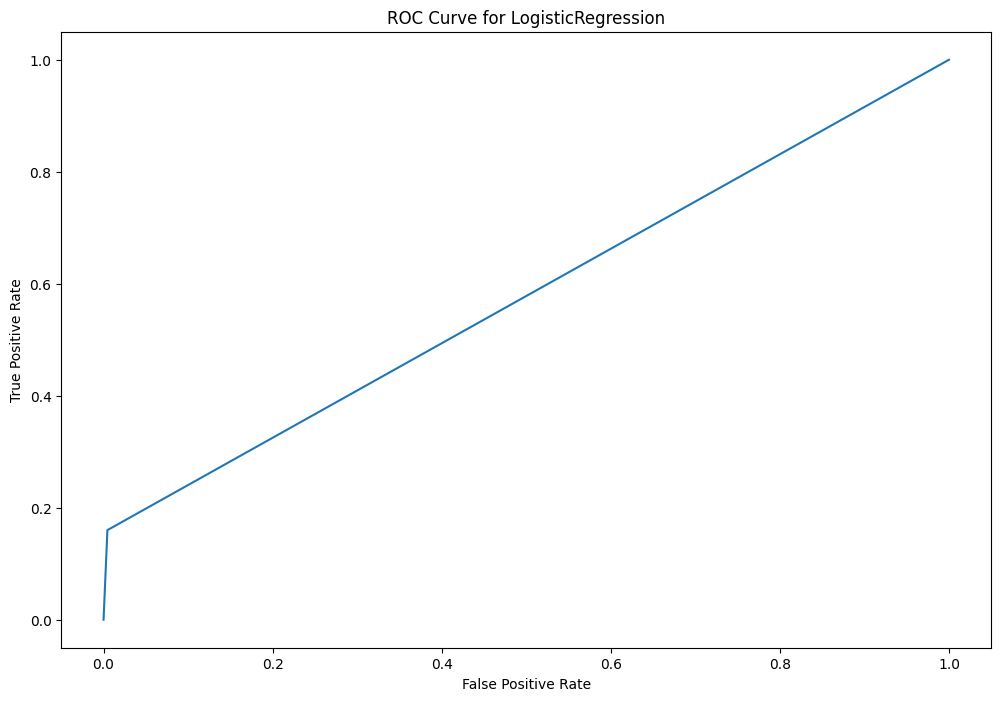

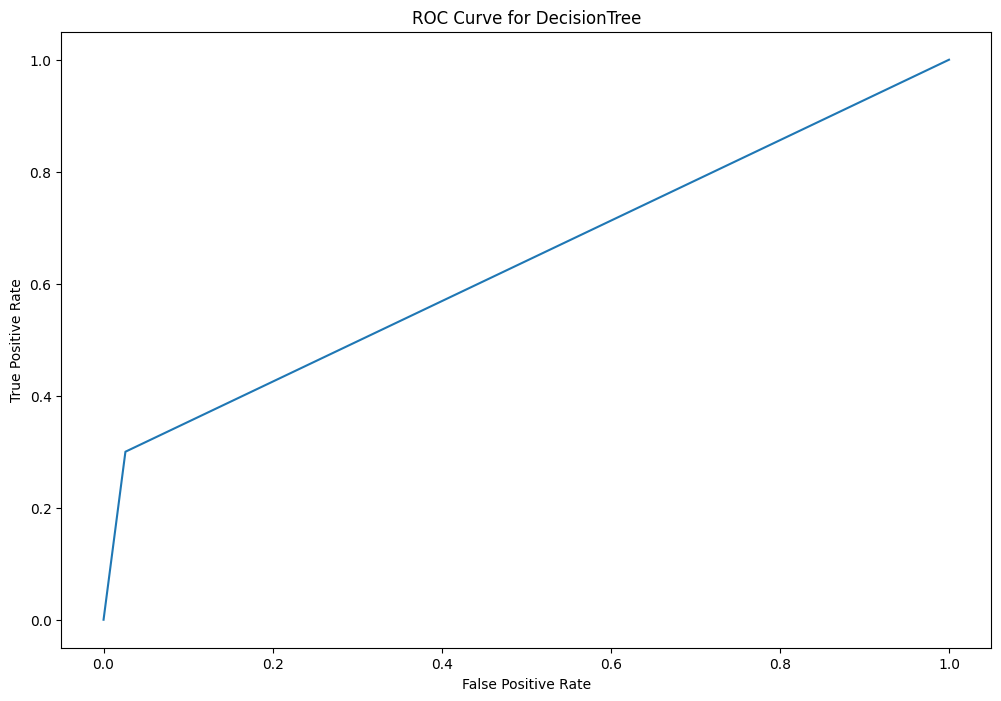

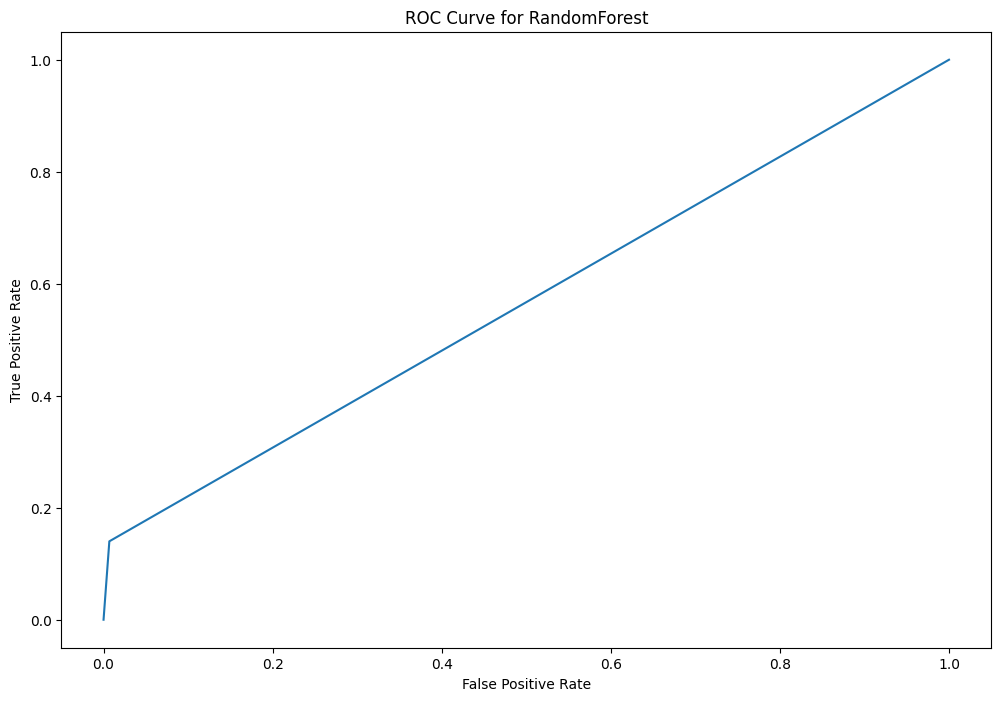

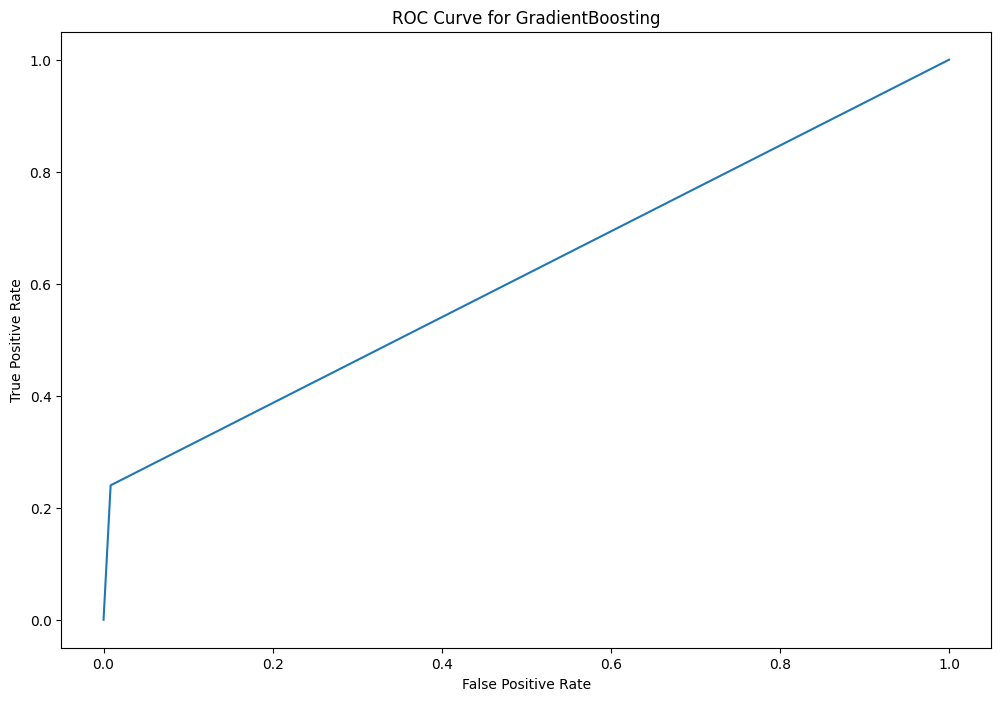

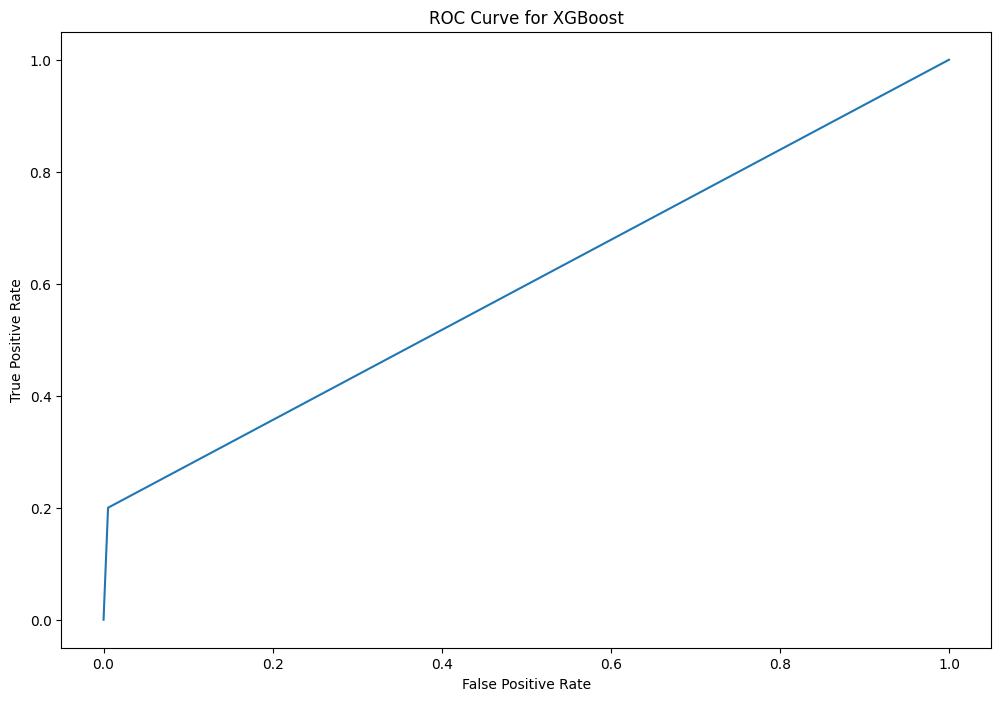

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score,roc_curve,roc_auc_score
for algo, model in models_used.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,label=f"{algo} (AUC = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {algo}')
    print(f"{algo} - Accuracy: {model.score(X_test, y_test)*100:.2f}% \n Precision: {precision:.4f} \n Recall: {recall:.4f} \n F1: {f1:.4f}\n Auc:{roc_auc}\n")

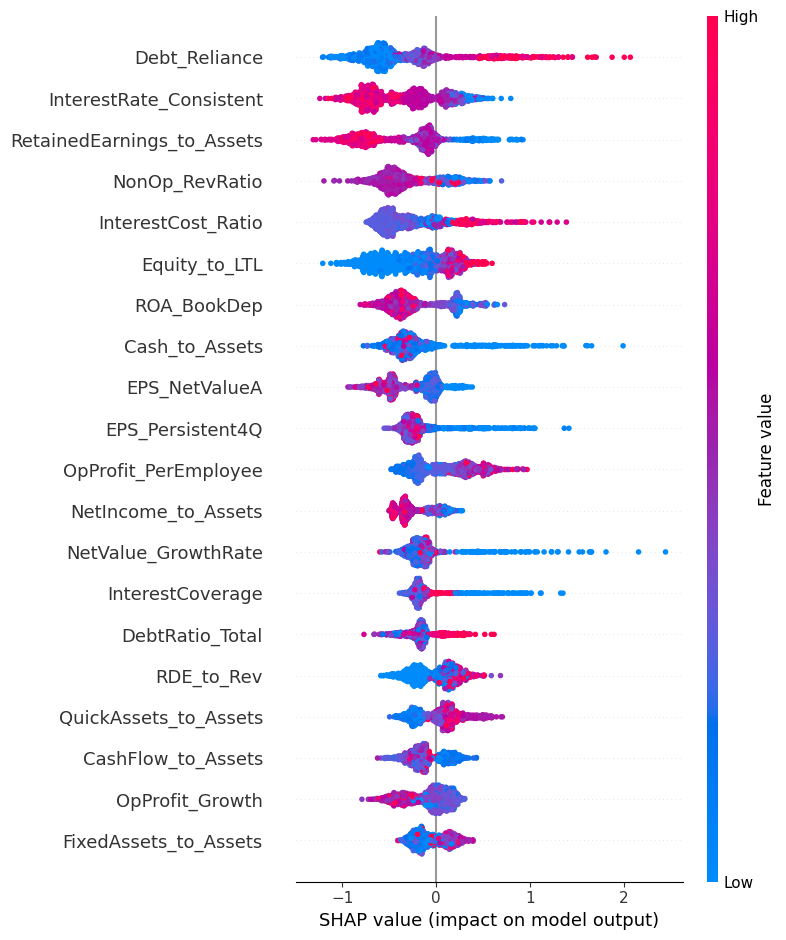

In [45]:
import shap

best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())


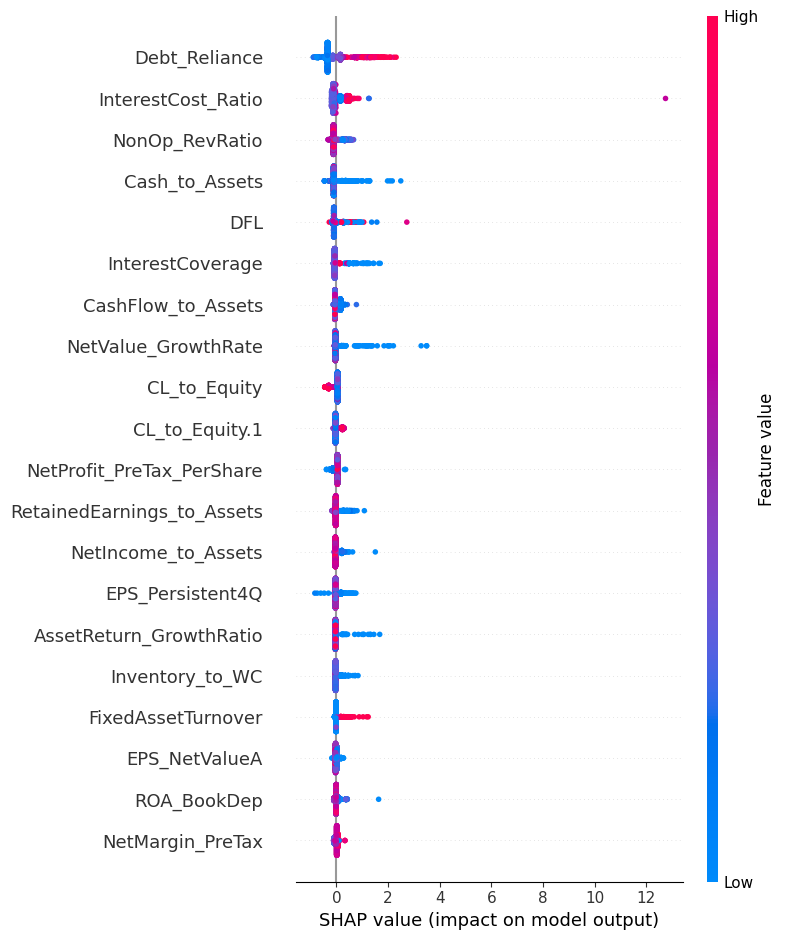

In [46]:
import shap
gboost_model = GradientBoostingClassifier()
gboost_model.fit(X_train, y_train)
explainer = shap.Explainer(gboost_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())
